## Importing Useful Libraries

In [80]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Market Breath Tool 1

In [79]:
# Define the stock indexes and their components
stock_indexes = {
    'NIFTY 50': ['BHARTIARTL.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'NTPC.NS', 'MARUTI.NS',
                   'NESTLEIND.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'TATASTEEL.NS',
                   'ONGC.NS', 'BAJAJ-AUTO.NS', 'LT.NS', 'ITC.NS', 'TCS.NS', 'BRITANNIA.NS',
                   'SHRIRAMFIN.NS', 'ADANIENT.NS', 'CIPLA.NS', 'WIPRO.NS', 'INDUSINDBK.NS',
                   'ULTRACEMCO.NS', 'TATACONSUM.NS', 'BAJAJFINSV.NS', 'RELIANCE.NS',
                   'HEROMOTOCO.NS', 'COALINDIA.NS', 'TITAN.NS', 'HINDALCO.NS',
                   'APOLLOHOSP.NS','TECHM.NS','DRREDDY.NS','DIVISLAB.NS','EICHERMOT.NS','BPCL.NS','SBILIFE.NS',
                   'LTIM.NS','GRASIM.NS','JSWSTEEL.NS','ASIANPAINT.NS','POWERGRID.NS','ADANIPORTS.NS','M&M.NS',
                   'TATAMOTORS.NS','SUNPHARMA.NS','AXISBANK.NS','HCLTECH.NS','HINDUNILVR.NS','INFY.NS','SBIN.NS',
                   'ICICIBANK.NS','HDFCBANK.NS'],
    'SENSEX': ['BHARTIARTL.NS', 'LTIM.NS', 'HDFCLIFE.NS', 'NTPC.NS', 'MARUTI.NS',
                   'NESTLEIND.NS', 'BAJFINANCE.NS', 'KOTAKBANK.NS', 'TATASTEEL.NS',
                   'ONGC.NS', 'BAJAJ-AUTO.NS', 'LT.NS', 'ITC.NS', 'TCS.NS', 'BRITANNIA.NS',
                   'SHRIRAMFIN.NS', 'ADANIENT.NS', 'CIPLA.NS', 'WIPRO.NS', 'INDUSINDBK.NS',
                   'ULTRACEMCO.NS', 'TATACONSUM.NS', 'BAJAJFINSV.NS', 'RELIANCE.NS',
                   'HEROMOTOCO.NS', 'COALINDIA.NS', 'TITAN.NS', 'HINDALCO.NS',
                   'APOLLOHOSP.NS','TECHM.NS'],  
    'BANK NIFTY': ['HDFCBANK.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'SBIN.NS','BANKBARODA.NS',
                   'PNB.NS','INDUSINDBK.NS','IDFCFIRSTB.NS','AUBANK.NS','FEDERALBNK.NS','BANDHANBNK.NS'],  
    'S&P500': ['MSFT',	'AAPL',	'NVDA',	'GOOG',	'GOOGL','AMZN',	'META'],
    # 'S&P 500': ['MSFT',	'AAPL',	'NVDA',	'GOOG',	'GOOGL','AMZN',	'META',	'LLY',	'AVGO',	'TSLA',	'JPM',	'WMT',	'V','XOM','UNH',
    #             'MA',	'ORCL',	'PG',	'COST',	'JNJ',	'HD',	'BAC',	'MRK',	'NFLX',	'ABBV',	'CVX',	'KO',	'AMD',	'CRM',	
    #             'ADBE',	'QCOM',	'PEP',	'WFC',	'TMUS',	'LIN',	'TMO',	'AMAT',	'ACN',	'CSCO',	'INTU',	'TXN',	'MCD',	'DIS',	
    #             'GE',	'ABT',	'DHR',	'VZ',	'AXP',	'AMGN',	'MS',	'CAT',	'NOW',	'IBM',	'PM',	'PFE',	'ISRG',	'MU',	
    #             'GS',	'BX',	'CMCSA',	'UBER',	'NEE',	'LRCX',	'SPGI',	'HON',	'UNP',	'T',	'RTX',	'COP',	'INTC',	
    #             'BKNG',	'SCHW',	'ETN',	'SYK',	'TJX',	'ELV',	'PGR',	'C',	'LOW',	'VRTX',	'BLK',	'UPS',	'KLAC',	'ADI',	
    #             'ANET',	'NKE',	'BA',	'BSX',	'LMT',	'REGN',	'PANW',	'MMC',	'PLD',	'CB',	'DE',	'MDT',	'ABNB',	'ADP',
    #             'CRWD',	'KKR',	'SNPS',	'CI',	'AMT',	'MDLZ',	'FI',	'SBUX',	'CDNS',	'HCA',	'SO',	'CMG',	'WM',	'GILD',
    #             'APH',	'BMY',	'ICE',	'ZTS',	'MO',	'CL',	'GD',	'MCO',	'DUK',	'MCK',	'SHW',	'TT',	'EOG',	'FCX',	
    #             'FDX',	'TDG',	'CTAS',	'CVS',	'EQIX',	'CME',	'ITW',	'NXPI',	'MAR',	'SLB',	'ECL',	'TGT',	'CEG',	'BDX',	
    #             'PH',	'CSX',	'NOC',	'MSI',	'AON',	'PNC',	'WELL',	'EMR',	'PYPL',	'USB',	'MPC',	'RSG',	'ORLY',	'ROP',
    #             'PSX',	'AJG',	'CARR',	'MMM',	'APD',	'OXY',	'EW',	'HLT',	'PCAR',	'GM',	'ADSK',	'COF',	'WMB',	'TFC',	
    #             'CPRT',	'VLO',	'MNST',	'AFL',	'F',	'PSA',	'MCHP',	'NEM',	'MET',	'AIG',	'SMCI',	'DLR',	'NSC',	'OKE',	
    #             'AZO',	'SPG',	'ROST',	'SRE',	'GEV',	'TRV',	'FTNT',	'KMB',	'AEP',	'HES',	'O',	'TEL',	'STZ',	'BK',	
    #             'JCI',	'GWW',	'DHI',	'MRNA',	'COR',	'KDP',	'KMI',	'DXCM',	'HUM',	'URI',	'CHTR',	'AMP',	'PRU',	'LHX',	
    #             'PAYX',	'FIS',	'ALL',	'CCI',	'D',	'MPWR',	'RCL',	'ODFL',	'IDXX',	'MSCI',	'OTIS',	'VRSK',	'LEN',	'KHC',	
    #             'AME',	'EL',	'FICO',	'IQV',	'NUE',	'PWR',	'CMI',	'DOW',	'HSY',	'A',	'FANG',	'EA',	'PEG',	'PCG',	
    #             'KR',	'IR',	'ACGL',	'CTVA',	'YUM',	'LULU',	'FAST',	'CNC',	'GEHC',	'GIS',	'KVUE',	'SYY',	'IT',	'EXC',	
    #             'NDAQ',	'BKR',	'HPQ',	'CTSH',	'DD',	'DFS',	'GLW',	'MLM',	'BIIB',	'EXR',	'HWM',	'VMC',	'XYL',	'LVS',
    #             'VST',	'ON',	'LYB',	'GRMN',	'ADM',	'ED',	'DAL',	'ROK',	'DVN',	'CSGP',	'HAL',	'EFX',	'TRGP',	'HIG',	
    #             'PPG',	'CDW',	'XEL',	'MTD',	'VICI',	'AVB',	'ANSS',	'TSCO',	'WAB',	'RMD',	'EIX',	'DG',	'IRM',	'HPE',
    #             'TTWO',	'CBRE',	'NTAP',	'WTW',	'EBAY',	'TROW',	'CHD',	'BRO',	'EQR',	'FTV',	'WDC',	'FITB',	'RJF',	'AWK',	
    #             'MTB',	'FSLR',	'GPN',	'WEC',	'DOV',	'ROL',	'IFF',	'DECK',	'TER',	'KEYS',	'BR',	'WST',	'VLTO',	'NVR',	
    #             'CAH',	'DLTR',	'DTE',	'ETR',	'AXON',	'STT',	'FE',	'PHM',	'INVH',	'PTC',	'ZBH',	'CCL',	'LYV',	'TYL',	
    #             'STE',	'STX',	'VTR',	'SBAC',	'ARE',	'PPL',	'GDDY',	'WRB',	'ES',	'CTRA',	'STLD',	'HUBB',	'LDOS','TSN',
    #             'WY',	'CNP',	'K',	'SYF',	'APTV',	'HBAN',	'AEE',	'CPAY',	'MKC',	'BALL',	'ULTA',	'GPC',	'PFG',	'TDY',
    #             'ALGN',	'RF',	'CINF',	'CBOE',	'BBY',	'WBD',	'CMS',	'EXPD',	'VRSN',	'OMC',	'ATO',	'AVY',	'DRI',	'DPZ',
    #             'J',	'MOH',	'ESS',	'NTRS',	'LUV',	'LH',	'HOLX',	'WAT',	'COO',	'BAX',	'SWKS',	'HRL',	'L',	'NRG',	
    #             'CLX',	'CFG',	'BLDR',	'TXT',	'JBHT',	'EQT',	'MAA',	'MRO',	'PKG',	'ZBRA',	'UAL',	'FDS',	'EG',	'EXPE',	
    #             'FOXA',	'DGX',	'FOX',	'BG',	'GEN',	'IP',	'NWSA',	'NWS',	'IEX',	'CE',	'MAS',	'AMCR',	'PODD',	'AKAM',
    #             'DOC',	'MGM',	'TRMB',	'SNA',	'ENPH',	'KEY',	'CAG',	'CPB',	'UDR',	'JBL',	'NDSN',	'LNT',	'KIM',	'INCY',
    #             'NI',	'CF',	'WRK',	'AES',	'RVTY',	'HST',	'PNR',	'VTRS',	'SWK',	'DVA',	'EVRG',	'LW',	'JKHY',	'AOS',	
    #             'BEN',	'JNPR',	'ALB',	'SJM',	'POOL',	'CPT',	'REG',	'KMX',	'EMN',	'TECH',	'QRVO',	'LKQ',	'UHS',	'APA',	
    #             'IPG',	'EPAM',	'TAP',	'RL',	'CRL',	'CHRW',	'CTLT',	'ALLE',	'TFX',	'FFIV',	'WYNN',	'HII',	'BXP',	'WBA',	
    #             'TPR',	'MOS',	'SOLV',	'PNW',	'AIZ',	'BBWI',	'GNRC',	'FRT',	'PAYC',	'HSIC',	'CZR',	'DAY',	'PARA',	'HAS',	
    #             'MTCH',	'BIO',	'MKTX',	'GL',	'NCLH',	'AAL',	'BWA',	'MHK',	'FMC',	'ETSY',	'IVZ',
    #             ],  
    'NASDAQ (QQQ)': ['MSFT','AAPL','NVDA','AMZN','AVGO','META','TSLA','GOOGL','GOOG','COST','NFLX','AMD','ADBE',
                     'QCOM','TMUS','LIN','AMAT','CSCO','INTU','TXN','AMGN','ISRG','CMCSA','MU','LRCX','HON','BKNG',
                     'INTC','VRTX','ADI','REGN','KLAC','PANW','ADP','ASML','SNPS','PDD','CRWD','MDLZ','SBUX','CDNS',
                     'GILD','MELI','CTAS','NXPI','MAR','ABNB','CSX','CEG'],
    'DOW JONES': ['AMZN','AXP','AMGN','AAPL','BA','CAT','CSCO','CVX','GS','HD','HON','IBM','INTC','JNJ','KO',
                  'JPM','MCD','MMM','MRK','MSFT','NKE','PG','TRV','UNH','CRM','VZ','V','WMT','DIS','DOW']
}

moving_averages = [20,50,100,200]

# Function to calculate the percentage of stocks above their moving averages
def calculate_percentages(index_name, tickers,data,i):
    percentages = {f'{ma}-day': 0 for ma in moving_averages}
    for ticker in tickers:
        for ma in moving_averages:
            ma_column = f'{ma}d'
            data[ticker, ma_column] = data['Close'][ticker].rolling(window=ma).mean()
            above_ma = data['Close'][ticker].iloc[i] > data[ticker, ma_column].iloc[i]
            percentages[f'{ma}-day'] += above_ma
    total_stocks = len(tickers)
    for ma in moving_averages:
        percentages[f'{ma}-day'] = (percentages[f'{ma}-day'] / total_stocks) * 100

    return percentages

# Calculate percentages for all indexes
data_frames = []
data0 = yf.download('RELIANCE.NS', period='1y')
data0.reset_index(inplace=True)

for index, tickers in stock_indexes.items():
    data = yf.download(tickers, period='1y')
    for i in range(len(data)-7,len(data)):
        results = {}
        results[index] = calculate_percentages(index, tickers,data,i)
        df = pd.DataFrame(results).T
        data_frames.append(df)

data1 = pd.DataFrame()
data2 = pd.DataFrame()
data3 = pd.DataFrame()
data4 = pd.DataFrame()
data5 = pd.DataFrame()
data6 = pd.DataFrame()
data7 = pd.DataFrame()

for i in range(len(data_frames)):
    if(i%7==0):
        data1 = pd.concat([data1, data_frames[i]], axis=0)
    elif(i%7==1):
        data2 = pd.concat([data2, data_frames[i]], axis=0)
    elif(i%7==2):
        data3 = pd.concat([data3, data_frames[i]], axis=0)
    elif(i%7==3):
        data4 = pd.concat([data4, data_frames[i]], axis=0)
    elif(i%7==4):
        data5 = pd.concat([data5, data_frames[i]], axis=0)
    elif(i%7==5):
        data6 = pd.concat([data6, data_frames[i]], axis=0)
    elif(i%7==6):
        data7 = pd.concat([data7, data_frames[i]], axis=0)
 
data1.columns = pd.MultiIndex.from_tuples([(data0['Date'].iloc[len(data0)-7], '20-day'),(data0['Date'].iloc[len(data0)-7], '50-day'),(data0['Date'].iloc[len(data0)-7], '100-day'),(data0['Date'].iloc[len(data0)-7], '200-day')])       
data2.columns = pd.MultiIndex.from_tuples([(data0['Date'].iloc[len(data0)-6], '20-day'),(data0['Date'].iloc[len(data0)-6], '50-day'),(data0['Date'].iloc[len(data0)-6], '100-day'),(data0['Date'].iloc[len(data0)-6], '200-day')])       
data3.columns = pd.MultiIndex.from_tuples([(data0['Date'].iloc[len(data0)-5], '20-day'),(data0['Date'].iloc[len(data0)-5], '50-day'),(data0['Date'].iloc[len(data0)-5], '100-day'),(data0['Date'].iloc[len(data0)-5], '200-day')])       
data4.columns = pd.MultiIndex.from_tuples([(data0['Date'].iloc[len(data0)-4], '20-day'),(data0['Date'].iloc[len(data0)-4], '50-day'),(data0['Date'].iloc[len(data0)-4], '100-day'),(data0['Date'].iloc[len(data0)-4], '200-day')])       
data5.columns = pd.MultiIndex.from_tuples([(data0['Date'].iloc[len(data0)-3], '20-day'),(data0['Date'].iloc[len(data0)-3], '50-day'),(data0['Date'].iloc[len(data0)-3], '100-day'),(data0['Date'].iloc[len(data0)-3], '200-day')])       
data6.columns = pd.MultiIndex.from_tuples([(data0['Date'].iloc[len(data0)-2], '20-day'),(data0['Date'].iloc[len(data0)-2], '50-day'),(data0['Date'].iloc[len(data0)-2], '100-day'),(data0['Date'].iloc[len(data0)-2], '200-day')])       
data7.columns = pd.MultiIndex.from_tuples([(data0['Date'].iloc[len(data0)-1], '20-day'),(data0['Date'].iloc[len(data0)-1], '50-day'),(data0['Date'].iloc[len(data0)-1], '100-day'),(data0['Date'].iloc[len(data0)-1], '200-day')])       
    
final_data=pd.DataFrame()

final_data = pd.concat([final_data, data1], axis=1)
final_data = pd.concat([final_data, data2], axis=1)
final_data = pd.concat([final_data, data3], axis=1)
final_data = pd.concat([final_data, data4], axis=1)
final_data = pd.concat([final_data, data5], axis=1)
final_data = pd.concat([final_data, data6], axis=1)
final_data = pd.concat([final_data, data7], axis=1)

final_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  50 of 50 completed
[*********************100%%**********************]  30 of 30 completed
[*********************100%%**********************]  12 of 12 completed
[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  49 of 49 completed
[*********************100%%**********************]  30 of 30 completed


2024-06-26                                      2024-06-27  \
                  20-day      50-day     100-day     200-day      20-day   
NIFTY 50       68.627451   82.352941   68.627451   80.392157   70.588235   
SENSEX         63.333333   80.000000   70.000000   73.333333   63.333333   
BANK NIFTY     91.666667   91.666667   83.333333   75.000000   91.666667   
S&P500        100.000000  100.000000  100.000000  100.000000  100.000000   
NASDAQ (QQQ)   81.632653   87.755102   79.591837   81.632653   71.428571   
DOW JONES      73.333333   56.666667   50.000000   70.000000   66.666667   

                                                  2024-06-28              ...  \
                  50-day     100-day     200-day      20-day      50-day  ...   
NIFTY 50       84.313725   80.392157   84.313725   74.509804   84.313725  ...   
SENSEX         80.000000   76.666667   76.666667   66.666667   80.000000  ...   
BANK NIFTY     91.666667   83.333333   75.000000   75.000000   83.333333  ...   
S&P500        100.000000  100.000000  100.000000  100.000000  100.000000  ...   
NASDAQ (QQQ)   79.591837   75.510204   79.591837   71.428571   83.673469  ...   
DOW JONES      56.666667   46.666667   70.000000   63.333333   56.666667  ...   

              2024-07-02             2024-07-03                          \
                 100-day     200-day     20-day      50-day     100-day   
NIFTY 50       74.509804   82.352941  78.431373   88.235294   86.274510   
SENSEX         66.666667   73.333333  66.666667   86.666667   80.000000   
BANK NIFTY     58.333333   66.666667  66.666667   75.000000   75.000000   
S&P500        100.000000  100.000000  85.714286  100.000000  100.000000   
NASDAQ (QQQ)   75.510204   83.673469  73.469388   81.632653   75.510204   
DOW JONES      53.333333   60.000000  63.333333   50.000000   53.333333   

                          2024-07-04                                      
                 200-day      20-day      50-day     100-day     200-day  
NIFTY 50       84.313725   74.509804   88.235294   84.313725   82.352941  
SENSEX         76.666667   63.333333   86.666667   76.666667   73.333333  
BANK NIFTY     66.666667   75.000000   75.000000   75.000000   66.666667  
S&P500        100.000000  100.000000  100.000000  100.000000  100.000000  
NASDAQ (QQQ)   83.673469   71.428571   85.714286   75.510204   83.673469  
DOW JONES      63.333333   60.000000   56.666667   43.333333   66.666667  

[6 rows x 28 columns]

## Market Breath Tool 2 - [Sector Wise]

In [69]:
def calculate_returns(ticker_symbol):
    
    stock_data=yf.download(ticker_symbol,period='6y')
    
    # Calculate returns
    return_1d=(stock_data['Close'].pct_change(periods=1)*100).iloc[-1]
    return_1w=(stock_data['Close'].pct_change(periods=5)*100).iloc[-1]
    return_3mo=(stock_data['Close'].pct_change(periods=63)*100).iloc[-1]
    return_6mo=(stock_data['Close'].pct_change(periods=126)*100).iloc[-1]
    return_1y=(stock_data['Close'].pct_change(periods=252)*100).iloc[-1]
    return_3y=(stock_data['Close'].pct_change(periods=252*3)*100).iloc[-1]
    return_5y=(stock_data['Close'].pct_change(periods=252*5)*100).iloc[-1]
    
    return {
        '1 Day Return(%)':return_1d,
        '1 Week Return(%)':return_1w,
        '3 Months Return(%)':return_3mo,
        '6 Months Return(%)':return_6mo,
        '1 Year Return(%)':return_1y,
        '3 Year Return(%)':return_3y,
        '5 Year Return(%)':return_5y
    }


ticker_symbols = ['XLP','XLI','XLC','XLY','XLU','XLB','XLRE','XLF','XLK','XLV']  

# Calculate returns for each ETF
results = {}
for symbol in ticker_symbols:
    results[symbol] = calculate_returns(symbol)
    
final_dataframe = pd.DataFrame(results).T

final_dataframe

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,1 Day Return(%),1 Week Return(%),3 Months Return(%),6 Months Return(%),1 Year Return(%),3 Year Return(%),5 Year Return(%)
XLP,-0.169776,-1.048541,2.562731,4.942348,2.260873,9.246822,30.845609
XLI,0.362978,-0.024652,-2.710915,7.816384,13.340794,18.808596,57.000912
XLC,0.034858,0.151230,3.960873,19.155704,31.837661,6.323324,73.498586
XLY,0.637797,2.421864,4.339852,5.994926,9.257537,5.163820,56.149692
XLU,0.602769,-0.523333,5.115210,6.505837,3.791900,8.223946,15.047076
XLB,0.746185,-0.936894,-5.512484,2.775504,5.506133,6.621315,48.871927
XLRE,-0.104714,1.059326,-0.702577,-5.614644,0.447481,-13.918344,3.978199
XLF,-0.311903,1.292050,-0.240102,10.037079,22.566364,13.246118,48.764765
XLK,1.348872,2.621107,11.948502,23.863634,33.823270,57.232827,192.848135
XLV,-0.761767,-1.923207,-0.506836,3.256957,8.857493,13.775313,53.920521


## Market Breath Tool 2 - [Relative Rotation Graph]

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


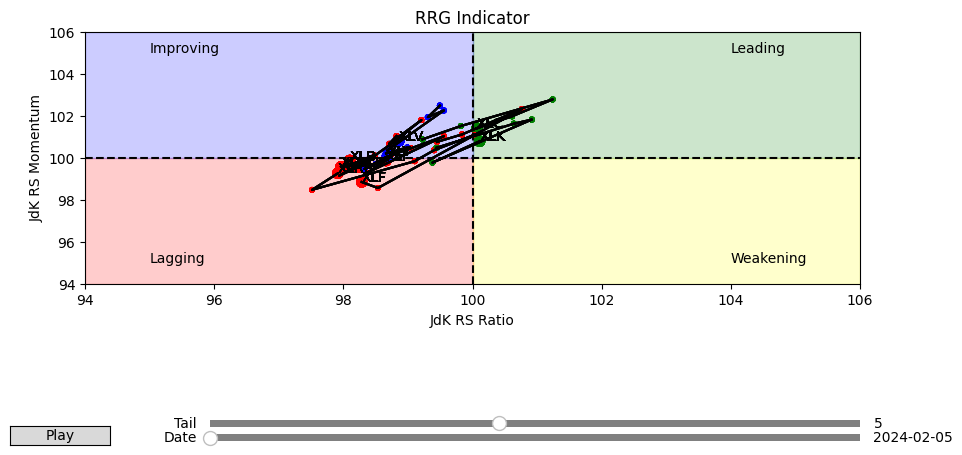

In [32]:
import matplotlib.animation as animation
from scipy import interpolate
from matplotlib.widgets import Slider, Button
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

is_playing = False
marker_size = []
tail = 5
start_date, end_date = None, None

for i in range(tail):
    if i == tail-1:
        marker_size.append(50)
    else:
        marker_size.append(10)

def get_line_points(x, y):
    # Interpolate a smooth curve through the scatter points
    tck, _ = interpolate.splprep([x, y], s=0)
    t = np.linspace(0, 1, 100)
    line_x, line_y = interpolate.splev(t, tck)
    return line_x, line_y

def get_status(x, y):
    if x < 100 and y < 100:
        return 'lagging'
    elif x > 100 and y > 100:
        return 'leading'
    elif x < 100 and y > 100:
        return 'improving'
    elif x > 100 and y < 100:
        return 'weakening'

def get_color(x, y):
    if get_status(x, y) == 'lagging':
        return 'red'
    elif get_status(x, y) == 'leading':
        return 'green'
    elif get_status(x, y) == 'improving':
        return 'blue'
    elif get_status(x, y) == 'weakening':
        return 'yellow'

# Retrieve historical prices
period = '1y'
tickers = ['XLP', 'XLI', 'XLC', 'XLY', 'XLU', 'XLB' , 'XLRE' , 'XLF' , 'XLK' , 'XLV']
tickers_metadata_dict = {
    'symbol': [],
    'name': []
}

for i in range(len(tickers)):
    info = yf.Ticker(tickers[i]).info
    tickers_metadata_dict['symbol'].append(info['symbol'])
    tickers_metadata_dict['name'].append(info['longName'])

tickers_to_show = tickers.copy()

benchmark = '^CNXAUTO'

tickers_data = yf.download(tickers, period=period, interval="1wk")['Adj Close']
benchmark_data = yf.download(benchmark, period=period, interval="1wk")['Adj Close']

stoxx = yf.download(benchmark, period=period, interval="1wk")['Adj Close']
window = 14

rs_tickers = []
rsr_tickers = []
rsr_roc_tickers = []
rsm_tickers = []

for i in range(len(tickers)):
    rs_tickers.append(100 * (tickers_data[tickers[i]]/ benchmark_data))
    rsr_tickers.append((100 + (rs_tickers[i] - rs_tickers[i].rolling(window=window).mean()) / rs_tickers[i].rolling(window=window).std(ddof=0)).dropna())
    rsr_roc_tickers.append(100 * ((rsr_tickers[i]/ rsr_tickers[i][1]) - 1))
    rsm_tickers.append((101 + ((rsr_roc_tickers[i] - rsr_roc_tickers[i].rolling(window=window).mean()) / rsr_roc_tickers[i].rolling(window=window).std(ddof=0))).dropna())
    rsr_tickers[i] = rsr_tickers[i][rsr_tickers[i].index.isin(rsm_tickers[i].index)]
    rsm_tickers[i] = rsm_tickers[i][rsm_tickers[i].index.isin(rsr_tickers[i].index)]

def update_rrg():
    global rs_tickers, rsr_tickers, rsr_roc_tickers, rsm_tickers
    rs_tickers = []
    rsr_tickers = []
    rsr_roc_tickers = []
    rsm_tickers = []

    for i in range(len(tickers)):
        rs_tickers.append(100 * (tickers_data[tickers[i]]/ benchmark_data))
        rsr_tickers.append((100 + (rs_tickers[i] - rs_tickers[i].rolling(window=window).mean()) / rs_tickers[i].rolling(window=window).std(ddof=0)).dropna())
        rsr_roc_tickers.append(100 * ((rsr_tickers[i]/ rsr_tickers[i][1]) - 1))
        rsm_tickers.append((101 + ((rsr_roc_tickers[i] - rsr_roc_tickers[i].rolling(window=window).mean()) / rsr_roc_tickers[i].rolling(window=window).std(ddof=0))).dropna())
        rsr_tickers[i] = rsr_tickers[i][rsr_tickers[i].index.isin(rsm_tickers[i].index)]
        rsm_tickers[i] = rsm_tickers[i][rsm_tickers[i].index.isin(rsr_tickers[i].index)]


root = tk.Tk()
root.title('RRG Indicator')
root.geometry('1000x650')
root.resizable(False, False)
# Create scatter plot of JdK RS Ratio vs JdK RS Momentum
# Upper plot is JdK RS Ratio vs JdK RS Momentum and below is a table of the status of each ticker
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
ax[0].set_title('RRG Indicator')
ax[0].set_xlabel('JdK RS Ratio')
ax[0].set_ylabel('JdK RS Momentum')

# Add horizontal and vertical lines to (100, 100) origin
ax[0].axhline(y=100, color='k', linestyle='--')
ax[0].axvline(x=100, color='k', linestyle='--')

# Color each quadrant
ax[0].fill_between([94, 100], [94, 94], [100, 100], color='red', alpha=0.2)
ax[0].fill_between([100, 106], [94, 94], [100, 100], color='yellow', alpha=0.2)
ax[0].fill_between([100, 106], [100, 100], [106, 106], color='green', alpha=0.2)
ax[0].fill_between([94, 100], [100, 100], [106, 106], color='blue', alpha=0.2)
# Add text labels in each corner
ax[0].text(95, 105, 'Improving')
ax[0].text(104, 105, 'Leading')
ax[0].text(104, 95, 'Weakening')
ax[0].text(95, 95, 'Lagging')

ax[0].set_xlim(94, 106)
ax[0].set_ylim(94, 106)

# Add plot to canvas
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

ax[1].set_axis_off()
collabels = ['symbol', 'name', 'sector', 'industry', 'price', 'chg']


# Add a slider for the end date
ax_end_date = plt.axes([0.25, 0.02, 0.65, 0.03], facecolor='grey')
slider_end_date = Slider(ax_end_date, 'Date', tail, len(rsr_tickers[0])-2, valinit=tail, valstep=1, initcolor='none', track_color='grey')
slider_end_date.poly.set_fc('grey')
date = str(rsr_tickers[0].index[slider_end_date.val]).split(' ')[0]
slider_end_date.valtext.set_text(date)

def update_slider_end_date(val):
    date = str(rsr_tickers[0].index[val]).split(' ')[0]
    slider_end_date.valtext.set_text(date)

slider_end_date.on_changed(update_slider_end_date)

# get the real date from the slider value
start_date = rsr_tickers[0].index[0]
end_date = rsr_tickers[0].index[slider_end_date.val]

#  Add a slider for the tail
ax_tail = plt.axes([0.25, 0.05, 0.65, 0.03])
slider_tail = Slider(ax_tail, 'Tail', 1, 10, valinit=5, valstep=1, initcolor='none', track_color='grey')
slider_tail.poly.set_fc('grey')

def update_slider_tail(val):
    global tail
    global marker_size
    # check if the end date - tail is less than the start date
    if slider_end_date.val - slider_tail.val < slider_end_date.valmin:
        slider_tail.eventson = False
        slider_tail.set_val(tail)
        slider_tail.eventson = True
        return
    # Update the min of the end date slider
    slider_end_date.valmin = slider_tail.val
    slider_end_date.ax.set_xlim(slider_tail.val, slider_end_date.valmax)
    tail = slider_tail.val
    marker_size = []
    for i in range(tail):
        if i == tail-1:
            marker_size.append(50)
        else:
            marker_size.append(10)

slider_tail.on_changed(update_slider_tail)

# Add a button to play the animation
ax_play = plt.axes([0.05, 0.02, 0.1, 0.04])
button_play = Button(ax_play, 'Play')

def update_button_play(event):
    global is_playing
    is_playing = not is_playing
    if is_playing:
        button_play.label.set_text('Pause')
    else:
        button_play.label.set_text('Play')

button_play.on_clicked(update_button_play)

table = tk.Frame(master=root)
table.pack(side=tk.BOTTOM, fill=tk.BOTH, expand=1)

headers = ['Symbol', 'Name', 'Price', 'Change', 'Visible']
widths = [20, 40, 20, 20, 10]
for j in range(len(headers)):
    tk.Label(table, text=headers[j], relief=tk.RIDGE, width=widths[j], font=('Arial', 12, 'bold')).grid(row=0, column=j)

def update_entry(event):
    global tickers_data
    symbol = event.widget.get()
    # Check if the symbol exists with yahoo finance
    try:
        ticker = yf.Ticker(symbol).info
        # Replace in tickers
        row = event.widget.grid_info()['row']
        # replace dataframe column
        tickers_data[symbol] = yf.download(symbol, period=period, interval='1wk')['Adj Close']
        # If previous symbol is in the ticker to show list, replace it with the new symbol
        previous_symbol = tickers_metadata_dict['symbol'][row-1]

        if previous_symbol in tickers_to_show:
            tickers_to_show.remove(previous_symbol)

        # Check if the symbol need to be displayed
        check_button = table.grid_slaves(row=row, column=4)[0]
        states = check_button.state()
        if 'selected' in check_button.state() and symbol not in tickers_to_show:
            tickers_to_show.insert(row-1, symbol)

        tickers[row-1] = symbol

        # Check if symbol is in the metadata dictionary
        if symbol not in tickers_metadata_dict['symbol']:
            # Add the symbol to the metadata dictionary
            tickers_metadata_dict['symbol'][row-1] = symbol
            tickers_metadata_dict['name'][row-1] = ticker['longName']

        # Update the name label
        table.grid_slaves(row=row, column=1)[0].config(text=ticker['longName'])
        # Update the RRG indicator
        update_rrg()
    except Exception as e:
        print(e)
        # Reset the entry to the previous symbol
        entry = event.widget
        row = entry.grid_info()['row']
        entry.delete(0, tk.END)
        entry.insert(0, tickers_metadata_dict['symbol'][row-1])

def update_check_button(event):
    global tickers_to_show

    check_button = event.widget
    row = check_button.grid_info()['row']
    # Get ticker symbol from the table
    symbol = tickers_metadata_dict['symbol'][row-1]

    # If the check button is checked, add the ticker to the list of tickers to show
    if 'selected' not in check_button.state() and symbol not in tickers_to_show:
        tickers_to_show.append(symbol)
    elif 'selected' in check_button.state() and symbol in tickers_to_show:
        tickers_to_show = [x for x in tickers_to_show if x != symbol]

def on_enter(event):
    ticker_name = event.widget.cget('text')
    event.widget.configure(text=ticker_name)

def on_leave(event):
    event.widget.configure(text='')

for i in range(len(tickers_to_show)):
    # Ticker symbol
    symbol = tickers_metadata_dict['symbol'][i]
    # Ticker name
    name = tickers_metadata_dict['name'][i]
    # Ticker price at end date
    price = round(tickers_data[symbol][end_date], 2)
    # Ticker change from start date to end date in percentage
    chg = round((price - tickers_data[symbol][start_date]) / tickers_data[symbol][start_date] * 100, 1)
    bg_color = get_color(rsr_tickers[i][-1], rsm_tickers[i][-1])
    fg_color = 'white' if bg_color in ['red', 'green'] else 'black'
    symbol_var = tk.StringVar()
    symbol_var.set(symbol)
    entry = tk.Entry(table, textvariable=symbol_var, relief=tk.RIDGE, width=20, bg=bg_color, fg=fg_color, font=('Arial', 12))
    entry.grid(row=i+1, column=0)
    entry.bind('<Return>', update_entry)
    tk.Label(table, text=name, relief=tk.RIDGE, width=40, bg=bg_color, fg=fg_color, font=('Arial', 12)).grid(row=i+1, column=1)
    tk.Label(table, text=price, relief=tk.RIDGE, width=20, bg=bg_color, fg=fg_color, font=('Arial', 12)).grid(row=i+1, column=2)
    tk.Label(table, text=chg, relief=tk.RIDGE, width=20, bg=bg_color, fg=fg_color, font=('Arial', 12)).grid(row=i+1, column=3)
    checkbox_var = tk.BooleanVar()
    checkbox_var.set(True)
    # Create the checkbox and add it to the cell
    checkbox = ttk.Checkbutton(table, variable=checkbox_var, onvalue=True, offvalue=False)
    checkbox.grid(row=i+1, column=4)
    checkbox.state(['selected'])
    checkbox.bind('<Button-1>', update_check_button)


# list of scatter plots for each ticker
scatter_plots = []
# list of line plots for each ticker
line_plots = []
# list of annotations for each ticker
annotations = []

for i in range(len(tickers)):
    scatter_plots.append(ax[0].scatter([], []))
    line_plots.append(ax[0].plot([], [], color='k', alpha=0.2)[0])
    annotations.append(ax[0].annotate(tickers[i], (0, 0), fontsize=8))

# animation function. This is called sequentially
def animate(i):
    global start_date, end_date

    if not is_playing:
        # take the value from the slider
        end_date = rsr_tickers[0].index[slider_end_date.val]
        start_date = rsr_tickers[0].index[slider_end_date.val - tail]

    # if the end date is reached, reset the start and end date
    else:
        start_date += pd.to_timedelta(1,unit='w')
        end_date += pd.to_timedelta(1,unit='w')

        # update the slider
        slider_end_date.eventson = False
        #slider_end_date.set_val((slider_end_date.val + 1)%slider_end_date.valmax)
        slider_end_date.eventson = True

    if end_date == rsr_tickers[0].index[-1]:
        start_date = rsr_tickers[0].index[0]
        end_date = start_date + pd.to_timedelta(tail,unit='w')

    for j in range(len(tickers)):
        # if ticker not to be displayed, skip it
        if tickers[j] not in tickers_to_show:
            scatter_plots[j] = ax[0].scatter([], [])
            line_plots[j] = ax[0].plot([], [], color='k', alpha=0.2)[0]
            annotations[j] = ax[0].annotate('', (0, 0), fontsize=8)

        else:
            filtered_rsr_tickers = rsr_tickers[j].loc[(rsr_tickers[j].index > start_date) & (rsr_tickers[j].index <= end_date)]
            filtered_rsm_tickers = rsm_tickers[j].loc[(rsm_tickers[j].index > start_date) & (rsm_tickers[j].index <= end_date)]
            # Update the scatter
            color = get_color(filtered_rsr_tickers.values[-1], filtered_rsm_tickers.values[-1])
            scatter_plots[j] = ax[0].scatter(filtered_rsr_tickers.values, filtered_rsm_tickers.values, color=color, s=marker_size)
            # Update the line
            line_plots[j] = ax[0].plot(filtered_rsr_tickers.values, filtered_rsm_tickers.values, color='black', alpha=0.2)[0]
            # Update the line with interpolation
            #line_plots[j].set_data(get_line_points(filtered_rsr_tickers.values, filtered_rsm_tickers.values))
            # Update the annotation
            annotations[j] = ax[0].annotate(tickers[j], (filtered_rsr_tickers.values[-1], filtered_rsm_tickers.values[-1]))

        # Update the price and change
        price = round(tickers_data[tickers[j]][end_date], 2)
        chg = round((price - tickers_data[tickers[j]][start_date]) / tickers_data[tickers[j]][start_date] * 100, 1)
        table.grid_slaves(row=j+1, column=2)[0].config(text=price)
        table.grid_slaves(row=j+1, column=3)[0].config(text=chg)

        bg_color = get_color(rsr_tickers[j][end_date], rsm_tickers[j][end_date])
        fg_color = 'white' if bg_color in ['red', 'green', 'blue'] else 'black'
        for k in range(4):
            table.grid_slaves(row=j+1, column=k)[0].config(bg=bg_color, fg=fg_color)

    return scatter_plots + line_plots + annotations

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=60, interval=100, blit=True)

root.mainloop()

## Market Breath 3 - [Correlation Matrix]

[*********************100%%**********************]  16 of 16 completed


Correlation on Closing Prices


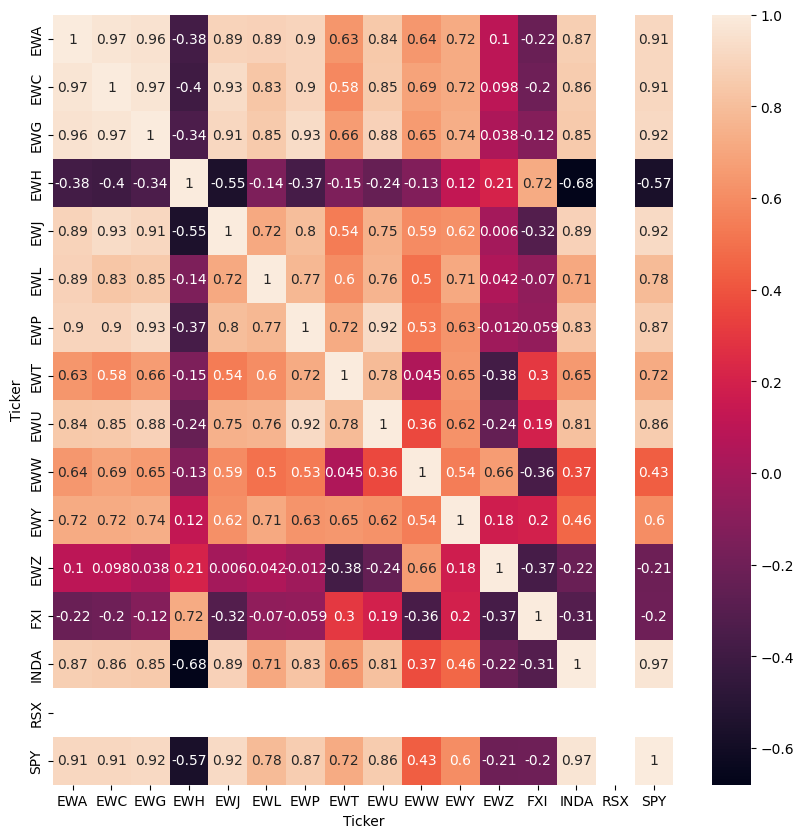

[*********************100%%**********************]  16 of 16 completed


Correlation on Daily Returns


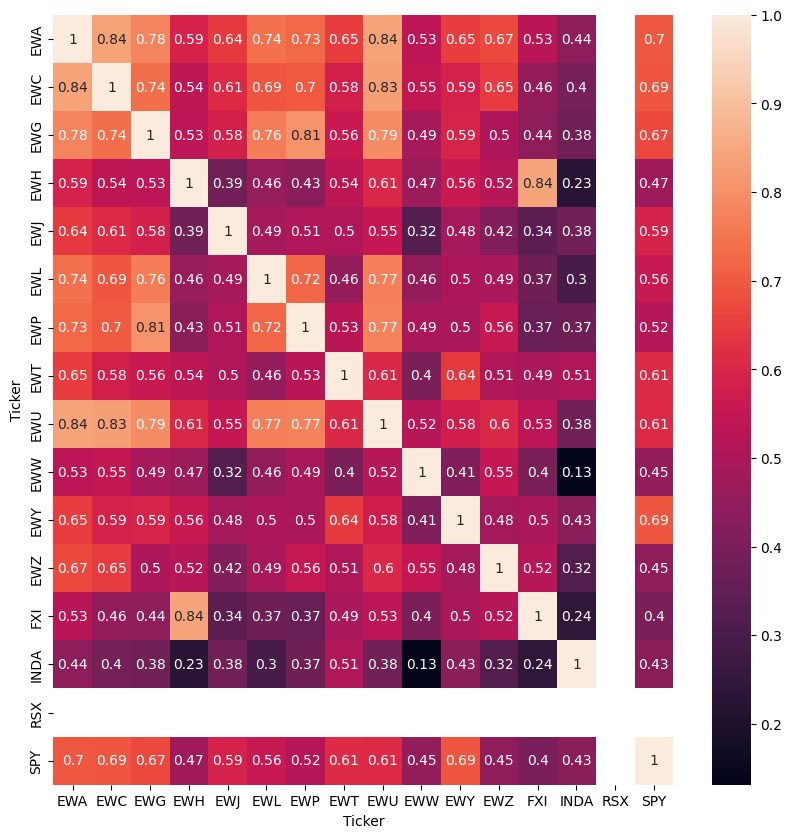

In [19]:
while(True):
    user_input1 = input("Enter duration of Correlation or Enter 'exit' to end: ")
    if(user_input1 == "exit"):
        break
    user_input2 = input("Enter 'close' for Correlation on Closing Prices or Enter 'returns' for Correlation on Daily Returns: ")    
    period = user_input1
    type = user_input2
    tickers = ['SPY','EWJ','EWZ','INDA','EWG','EWY','EWT','FXI','EWC','EWU','EWH','RSX','EWA','EWL','EWW','EWP']
    if (type == 'close'):
        data = yf.download(tickers, period=period, interval="1d")['Close']
        print("Correlation on Closing Prices")
    elif (type == 'returns'):
        data = yf.download(tickers, period=period, interval="1d")['Close'].pct_change(axis=0,fill_method='bfill')
        print("Correlation on Daily Returns")
    corr = data.corr()
    plt.figure(figsize = (10,10))
    sns.heatmap(corr, annot=True)
    plt.show()
